# Title

**Author**:

**Date**:

**Goal**:

**Conclusion**:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from typing import List

logging.basicConfig(level=logging.WARNING)

In [3]:
from pyro.ops.stats import hpdi, pi # , pi, quantile
import torch
import pyro

# Creating a fake dataset

In [8]:
def test(*bla):
    return bla

In [9]:
test(1, 2, 3)

(1, 2, 3)

In [27]:
from prophet_remade.prophet_util import get_A, get_changepoints, sort_arrays_using_array, summary
from prophet_remade.dataset import generate_dataset_v2

In [28]:
fourier_order = 2
params = {
    "deltas": np.array([0.5, -2]),
    "k": 1,
    "sigma": 2,
    "fourier_coefficients": 5 * np.concatenate([np.ones(fourier_order), np.zeros(fourier_order)]),
    "period": 20
}

In [29]:
x2, y2 = generate_dataset_v2(**params)

(100,)


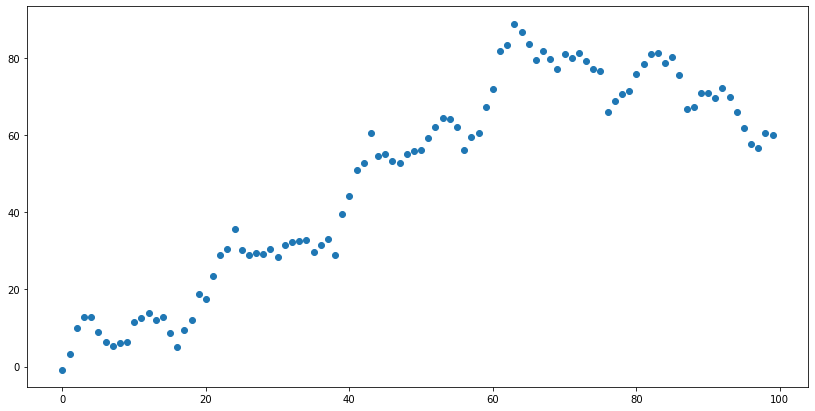

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(x2, y2, 'o')

In [33]:
from prophet_remade.prophet import Prophet

In [34]:
model = Prophet(num_changepoints=2, fourier_order=5, period=10)

In [35]:
samples = model.fit(x2, y2, num_samples=101)

Warmup:   0%|          | 0/201 [00:00, ?it/s]/home/nedim/Projects/prophet-remade/src/prophet_remade/prophet.py:137: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  print(f"Deltas shape: {delta.shape}")
/home/nedim/Projects/prophet-remade/src/prophet_remade/prophet.py:138: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  print(f"Changepoints shape: {changepoints.shape}")
/home/nedim/Projects/prophet-remade/src/prophet_remade/prophet.py:139: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data 

(100,)
Deltas shape: torch.Size([1, 2])
Changepoints shape: torch.Size([1, 2])
Gamma shape: torch.Size([1, 2])
X shape: torch.Size([1, 100])
A shape: torch.Size([2, 100])
Fourier terms shape: torch.Size([10, 100])
seasonality shape: torch.Size([1, 100])
Deltas shape: torch.Size([1, 2])
Changepoints shape: torch.Size([1, 2])
Gamma shape: torch.Size([1, 2])
X shape: torch.Size([1, 100])
A shape: torch.Size([2, 100])
Fourier terms shape: torch.Size([10, 100])
seasonality shape: torch.Size([1, 100])
Deltas shape: torch.Size([1, 2])
Changepoints shape: torch.Size([1, 2])
Gamma shape: torch.Size([1, 2])
X shape: torch.Size([1, 100])
A shape: torch.Size([2, 100])
Fourier terms shape: torch.Size([10, 100])
seasonality shape: torch.Size([1, 100])
Deltas shape: torch.Size([1, 2])
Changepoints shape: torch.Size([1, 2])
Gamma shape: torch.Size([1, 2])
X shape: torch.Size([1, 100])
A shape: torch.Size([2, 100])
Fourier terms shape: torch.Size([10, 100])
seasonality shape: torch.Size([1, 100])


Sample: 100%|██████████| 201/201 [00:26,  7.70it/s, step size=7.03e-02, acc. prob=0.967]

BEFORE k: dim torch.Size([101])
BEFORE delta: dim torch.Size([101, 1, 2])
AFTER delta: dim torch.Size([101, 2])
BEFORE beta: dim torch.Size([101, 1, 10])
AFTER beta: dim torch.Size([101, 10])
BEFORE sigma: dim torch.Size([101])


In [36]:
model.summary()

,mean,std,5%,25%,50%,75%,95%
k,1.002804,0.026075,0.958585,0.983936,1.004487,1.022237,1.045473
sigma,4.247841,0.324221,3.781186,4.037144,4.212213,4.457510,4.828117
delta_0,0.494259,0.066470,0.394895,0.442334,0.494975,0.545384,0.607791
delta_1,-2.072275,0.085130,-2.196217,-2.140496,-2.067866,-2.011775,-1.927389
a_0,3.603393,0.501526,2.712125,3.287629,3.569140,3.886122,4.425153
a_1,-0.518660,0.570529,-1.498667,-0.889415,-0.546185,-0.137514,0.418351
a_2,0.171877,0.562181,-0.635845,-0.228279,0.104654,0.541328,1.032029
a_3,-0.156030,0.520849,-1.014890,-0.489864,-0.136337,0.238583,0.617291
a_4,0.016608,0.891397,-1.389284,-0.513163,-0.025303,0.594149,1.260592
b_0,-0.058704,0.435929,-0.729250,-0.305170,-0.085850,0.263551,0.625400


In [37]:
subset = x2[:100]
subset_y = y2[:100]

In [38]:
mu = model.predict(subset)

(100,)
k: torch.Size([101, 1])
delta: torch.Size([101, 2])
A: torch.Size([2, 100])
gamma: torch.Size([101, 2])


In [39]:
hdpi_upper = pi(mu, prob=0.99, dim=1)[:,1]
hdpi_lower = pi(mu, prob=0.99, dim=1)[:,0]

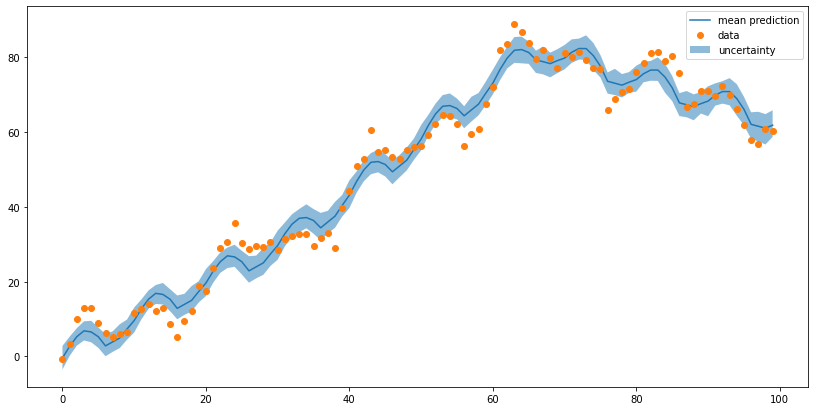

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(subset, mu.mean(axis=1), label='mean prediction')
plt.fill_between(subset, hdpi_lower, hdpi_upper, alpha = 0.5, label='uncertainty')
plt.plot(subset, subset_y, 'o', label='data')

plt.legend(loc='best')
